<a href="https://colab.research.google.com/github/tvs-dk/data-analysis/blob/main/Linear_interpolation_multiple_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run this cell to upload the data

In [ ]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving 0_mM_NaCl.csv to 0_mM_NaCl.csv
Saving 10_mM_NaCl.csv to 10_mM_NaCl.csv
Saving 25_mM_NaCl.csv to 25_mM_NaCl.csv
Saving 50_mM_NaCl.csv to 50_mM_NaCl.csv


# **This is the final script:**
##Prerequisites:
* The CSV data files need to have one x-column and one y-column, named 
"x" and "y", respectively.

##The script does the following to all CSV files in the current directory
* The x-values are first divided by 60 (i.e. converted from seconds to minutes)
* The x-values are then changed to 2-minutes intervals (e.g. 0, 2, 4, 6 min etc.)
* Interpolation is then performed on the y-data to calculate the corresponding y-value at each 2-min "x" inverval 
> * The interpolation "kind" is *linear* by default but can be changed to i.e. *cubic* (under # Define interpolation function)







Note that:
The script first checks whether the minimum value of x is greater than 0, and if so, adds a new data point to the beginning of the x and y arrays with x=0 and y=the first value of y in the original data. This ensures that the interpolation function can handle x values below the minimum value in the original data



In [ ]:
import os
import pandas as pd
from scipy.interpolate import interp1d

# Create output folder if it doesn't exist
if not os.path.exists('output'):
    os.makedirs('output')

# Get list of CSV files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.csv')]

# Iterate over CSV files
for filename in files:
    # Load CSV file into a pandas DataFrame
    data = pd.read_csv(filename)

    # Divide x values by 60
    data['x'] /= 60

    # Define x and y arrays from DataFrame
    x = data['x'].values
    y = data['y'].values

    # Check if x values include 0, and if not, add a data point to the beginning of the arrays
    if min(x) > 0:
        x = list(x)
        y = list(y)
        x.insert(0, 0)
        y.insert(0, y[0])

    # Define interpolation function
    interp_func = interp1d(x, y, kind='linear')

    # Create new x values to interpolate at (every 2 units)
    new_x = list(range(int(min(x)), int(max(x))+1, 2))

    # Interpolate y values at new x values
    new_y = interp_func(new_x)

    # Create a new DataFrame with interpolated values
    output = pd.DataFrame({'x': new_x, 'y': new_y})

    # Save output to CSV file with original filename + "_output"
    output_filename = os.path.join('output', filename.replace('.csv', '_output.csv'))
    output.to_csv(output_filename, index=False)


# **This script can be used to plot the data**
* Either plot the original data or... 
* ...plot the output (interpolated) data
* Change the name of the csv in the script to the file that you want to plot

* **Note: to plot the output data, change directory to output:** 


```python
        %cd output #use the "change dir" cells below)
```

 





In [ ]:
# Change dir to output
%cd /content/output/

/content/output


In [ ]:
# Change dir to content
%cd /content/

/content


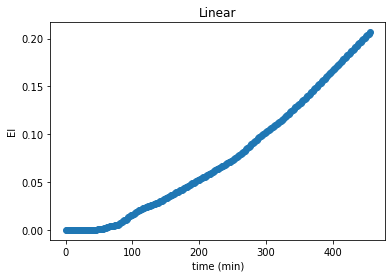

In [ ]:
import matplotlib.pyplot as plt
import os
# Read the csv file
df = pd.read_csv("25_mM_NaCl_output.csv")

# Plot the data in a scatterplot
plt.scatter(df['x'], df['y'])
plt.xlabel('time (min)')
plt.ylabel('EI')
plt.title('Linear')

# Show the plot
plt.show()

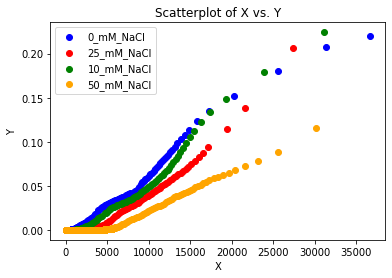

The order of the datasets is:  ['0_mM_NaCl', '25_mM_NaCl', '10_mM_NaCl', '50_mM_NaCl']
The 'order ID' of each dataset is:  [2, 0, 1, 3]


In [ ]:
# This block can plot all files in one plot 
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Find all csv files in current directory
csv_files = glob.glob("*.csv")

# Create empty list to hold all dataframes and dataset names
df_list = []
name_list = []



# Read each csv file into a dataframe and append to list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
    name_list.append(os.path.splitext(csv_file)[0])

# Specify the desired order of datasets (first dataset is "0")
desired_order = [2, 0, 1, 3]

# Rearrange the dataframes and names according to the desired order
df_list = [df_list[i] for i in desired_order]
name_list = [name_list[i] for i in desired_order]

# Create a list of colors for each dataframe
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

# Create scatterplot for each dataframe using a different color and name
for i, df in enumerate(df_list):
    plt.scatter(df['x'], df['y'], color=colors[i], label=name_list[i])

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs. Y')

dpi = 600

# Add legend
plt.legend()

# Show the plot
plt.show()

# Show the order of how the dataset are read
print("The order of the datasets is: ", name_list)
print("The 'order ID' of each dataset is: ", desired_order)





# **This script combines all csv files in the current directory into a single "combined" csv file**


*   The script automatically goes to the output folder (cd output)... 
* ...and runs the script there.
* and then cd's black to the content folder



In [ ]:
# Go to the output folder containing the output data
%cd /content/output/

import os
import pandas as pd

# Get all CSV files in current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]

# Initialize empty DataFrame
df = pd.DataFrame()

# Loop through CSV files and append to DataFrame
for file in csv_files:
    # Read CSV file into DataFrame
    file_df = pd.read_csv(file, header=None, names=['x_'+file[:-4], 'y_'+file[:-4]])
    # Append to main DataFrame
    df = pd.concat([df, file_df], axis=1)

# Write combined DataFrame to CSV file
df.to_csv('combined.csv', index=False)

%cd /content/


/content/output
/content


# *These are a number of earlier versions of the script*
Next, perform the linear interpolation. Can be changed to cubic interpolation, by changing "kind" to cubic.



In [ ]:
import pandas as pd
from scipy.interpolate import interp1d

# Load CSV file into a pandas DataFrame
data = pd.read_csv('data.csv')

# Define x and y arrays from DataFrame
x = data['x'].values
y = data['y'].values

# Define interpolation function
interp_func = interp1d(x, y, kind='linear')

# Create new x values to interpolate at (every 2 units)
new_x = list(range(int(min(x)), int(max(x))+1, 2))

# Interpolate y values at new x values
new_y = interp_func(new_x)

# Create a new DataFrame with interpolated values
output = pd.DataFrame({'x': new_x, 'y': new_y})

# Save output to CSV file
output.to_csv('output.csv', index=False)


FileNotFoundError: ignored

## This is an earlier version of the script
Below is a version that also transforms the data in sec to min

In [ ]:
import pandas as pd
from scipy.interpolate import interp1d

# Load CSV file into a pandas DataFrame
data = pd.read_csv('data.csv')

# Divide x values by 60
data['x'] = data['x'] / 60

# Define x and y arrays from DataFrame
x = data['x'].values
y = data['y'].values

# Define interpolation function
interp_func = interp1d(x, y, kind='linear')

# Create new x values to interpolate at (every 2 units)
new_x = list(range(int(min(x)), int(max(x))+1, 2))

# Interpolate y values at new x values
new_y = interp_func(new_x)

# Create a new DataFrame with interpolated values
output = pd.DataFrame({'x': new_x, 'y': new_y})

# Save output to CSV file
output.to_csv('output.csv', index=False)


## This is an earlier version of the script


Below is version that runs on all csv files

In [ ]:
import os
import pandas as pd
from scipy.interpolate import interp1d

# Get list of CSV files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.csv')]

# Iterate over CSV files
for filename in files:
    # Load CSV file into a pandas DataFrame
    data = pd.read_csv(filename)

    # Divide x values by 60
    data['x'] /= 60

    # Define x and y arrays from DataFrame
    x = data['x'].values
    y = data['y'].values

    # Define interpolation function
    interp_func = interp1d(x, y, kind='linear')

    # Create new x values to interpolate at (every 2 units)
    new_x = list(range(int(min(x)), int(max(x))+1, 2))

    # Interpolate y values at new x values
    new_y = interp_func(new_x)

    # Create a new DataFrame with interpolated values
    output = pd.DataFrame({'x': new_x, 'y': new_y})

    # Save output to CSV file with original filename + "_output"
    output_filename = filename.replace('.csv', '_output.csv')
    output.to_csv(output_filename, index=False)


## This is an earlier version of the script

This updated script first checks whether the minimum value of x is greater than 0, and if so, adds a new data point to the beginning of the x and y arrays with x=0 and y=the first value of y in the original data. This ensures that the interpolation function can handle x values below the minimum value in the original data

In [ ]:
import os
import pandas as pd
from scipy.interpolate import interp1d

# Get list of CSV files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.csv')]

# Iterate over CSV files
for filename in files:
    # Load CSV file into a pandas DataFrame
    data = pd.read_csv(filename)

    # Divide x values by 60
    data['x'] /= 60

    # Define x and y arrays from DataFrame
    x = data['x'].values
    y = data['y'].values

    # Check if x values include 0, and if not, add a data point to the beginning of the arrays
    if min(x) > 0:
        x = list(x)
        y = list(y)
        x.insert(0, 0)
        y.insert(0, y[0])

    # Define interpolation function
    interp_func = interp1d(x, y, kind='linear')

    # Create new x values to interpolate at (every 2 units)
    new_x = list(range(int(min(x)), int(max(x))+1, 2))

    # Interpolate y values at new x values
    new_y = interp_func(new_x)

    # Create a new DataFrame with interpolated values
    output = pd.DataFrame({'x': new_x, 'y': new_y})

    # Save output to CSV file with original filename + "_output"
    output_filename = filename.replace('.csv', '_output.csv')
    output.to_csv(output_filename, index=False)
